**Introduction:** 

People use online forms as outlets of expression, and as a result, it is important to identify when responses on social media outlets correlate to poor mental health. Models that use text data from social media outlets can be used to detect signs of mental health issues early, and can therefore encourage earlier intervention. This project aims to make mental health data more accessible and easy to interpret so that more people can acquire help when needed. 

**Objectives:**
1. Clean and preprocess a dataset with subreddits that provide insight to a person's mental health
2. Construct graphs to illustrate the distribution of responses
3. Conduct sentiment analysis 
4. Train a Naive Bayes model and a Logistic Regression model to predict if peoples' responses indicate mental illnesses.

In [1]:
# Importing python modules and packages

# Tools to create a data frame
import pandas as pd
from pandas import DataFrame

# Tools for text preprocessing
import nltk
import re

# Tools to remove stopwords
from nltk.corpus import stopwords

# Tools for tokenizing
from nltk.tokenize.toktok import ToktokTokenizer

# Tools for lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Tools for plotting
import matplotlib.pyplot as plt

# Tools for finding word frequencies
from nltk.util import ngrams

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Reading in data file
data = pd.read_csv('/kaggle/input/mental-health/mental_health.csv')

In [3]:
# Looking at data
data.head(10)

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0
7,deserve liveif died right noone would carei re...,1
8,feels good ive set dateim killing friday nice ...,1
9,live guiltok made stupid random choice its ge...,1


In [4]:
# Cleaning data (again) to ensure all functions have been completed

# Removing special characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [5]:
# Removing Stopwords
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no') 
stopword_list.remove('not') 

# Tokenizing 
def remove_stopwords(text, is_lower_case=False):

    tokens = tokenizer.tokenize(text)
    # remove whitespaces in each token
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
  
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [6]:
#%% Stemming

def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()

    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


In [7]:
# Lemmatization
# making lowercase
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    s = " " 
    t_l = [] # creating an empty list
    t_w = nltk.word_tokenize(text) 
 
    for w in t_w: # ensuring that only verbs are lemmatized 
       
        l_w = wordnet_lemmatizer.lemmatize(w, pos="v")
        # append l_w into the list t_l
        t_l.append(l_w)
    # making a complete sentence
    text = s.join(t_l)
    return text

In [8]:
# Checking cleaned data 
print(data)

                                                    text  label
0      dear american teens question dutch person hear...      0
1      nothing look forward lifei dont many reasons k...      1
2      music recommendations im looking expand playli...      0
3      im done trying feel betterthe reason im still ...      1
4      worried  year old girl subject domestic physic...      1
...                                                  ...    ...
27972  posting everyday people stop caring  religion ...      0
27973  okay definetly need hear guys opinion ive pret...      0
27974  cant get dog think ill kill myselfthe last thi...      1
27975  whats point princess bridei really think like ...      1
27976  got nudes person might might know snapchat do ...      0

[27977 rows x 2 columns]


In [9]:
#%% Saving cleaned data
data.to_csv("Mental_Health_Preprocessed2.csv")

In [10]:
# Renaming headers
new_headers = ['Response','Label']
data.columns = new_headers

In [11]:
# Checking new headers
data.head(10)

,Response,Label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0
7,deserve liveif died right noone would carei re...,1
8,feels good ive set dateim killing friday nice ...,1
9,live guiltok made stupid random choice its ge...,1


In [12]:
# Exploratory Data Analysis
# zero (0) means not flagged as mental illness, one (1) means flagged as mental illness
groups = data.groupby('Label').agg({'Label':'count'})


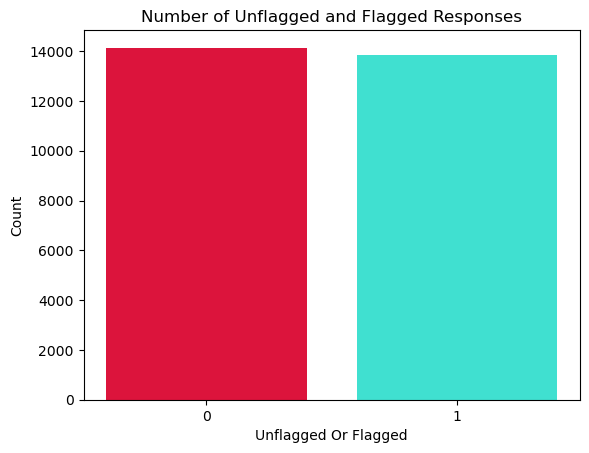

In [13]:
# Creating a bar graph to compare the number of responses in each category (not mental illness vs. mental illness)
bars = plt.bar(range(2),groups.Label,color=('crimson','turquoise'))

plt.xlabel('Unflagged Or Flagged')
plt.ylabel('Count')
plt.title('Number of Unflagged and Flagged Responses')


plt.xticks([0,1])

plt.show()

In [14]:
# Creating a bigram for reponses labeled 0
Mental_Health_Word =[]
for words in data[data.Label == 0].Response:
    tokens = tokenizer.tokenize(words)
    for token in tokens:
       Mental_Health_Word.append(token)
mental_health_bigrams_series = (pd.Series(nltk.ngrams(Mental_Health_Word,2)).value_counts())[:20]

In [15]:

Mental_Health_Word = []

for words in data[data.Label == 0].Response:
    tokens = tokenizer.tokenize(words)
    for token in tokens:
        # Addding if condition to filter out "br" and "filler" and "gtpopIt" 
        if token.lower() not in ["br", "filler", "gtpoplt"]:
            Mental_Health_Word.append(token.lower())  # Convert to lowercase for consistency

mental_health_bigrams_series = pd.Series(nltk.ngrams(Mental_Health_Word, 2)).value_counts()[:20]


Text(0, 0.5, 'Bigram')

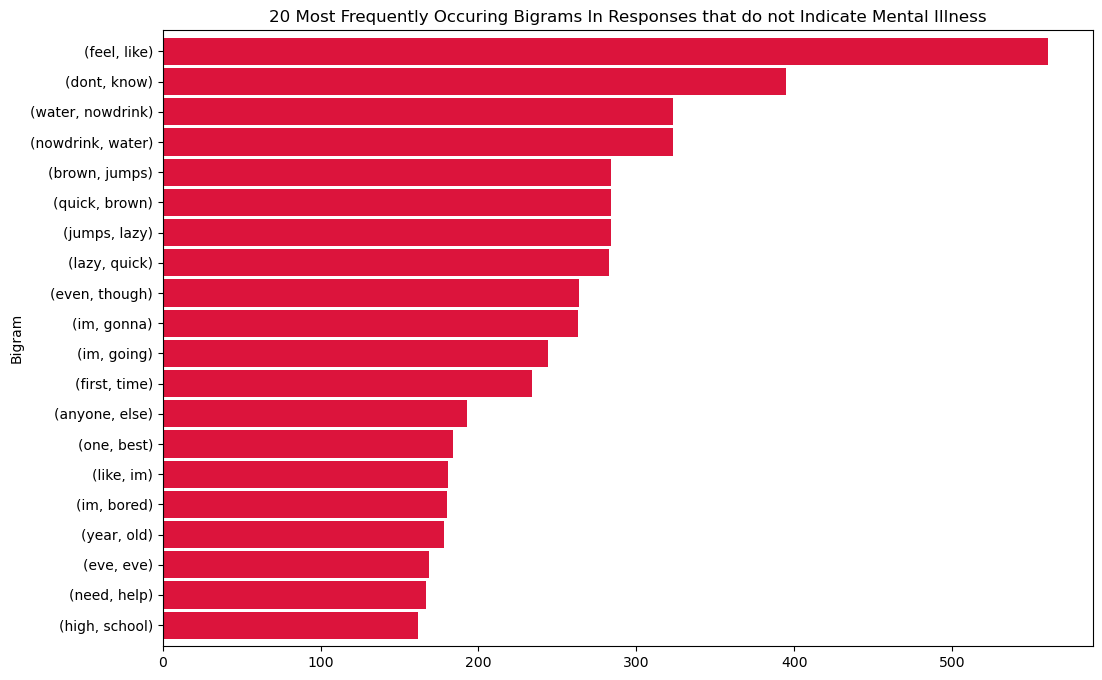

In [16]:
# Creating a plot of the number of bigrams for unflagged responses
mental_health_bigrams_series.sort_values().plot.barh(color='crimson', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams In Responses that do not Indicate Mental Illness')
plt.ylabel('Bigram')

In [17]:
# Creating a bigram for responses labeled 1
Mental_Health_Word =[]
for words in data[data.Label == 1].Response:
    tokens = tokenizer.tokenize(words)
    for token in tokens:
       Mental_Health_Word.append(token)
mental_health_bigrams_series = (pd.Series(nltk.ngrams(Mental_Health_Word,2)).value_counts())[:20]

Text(0.5, 0, 'Frequency')

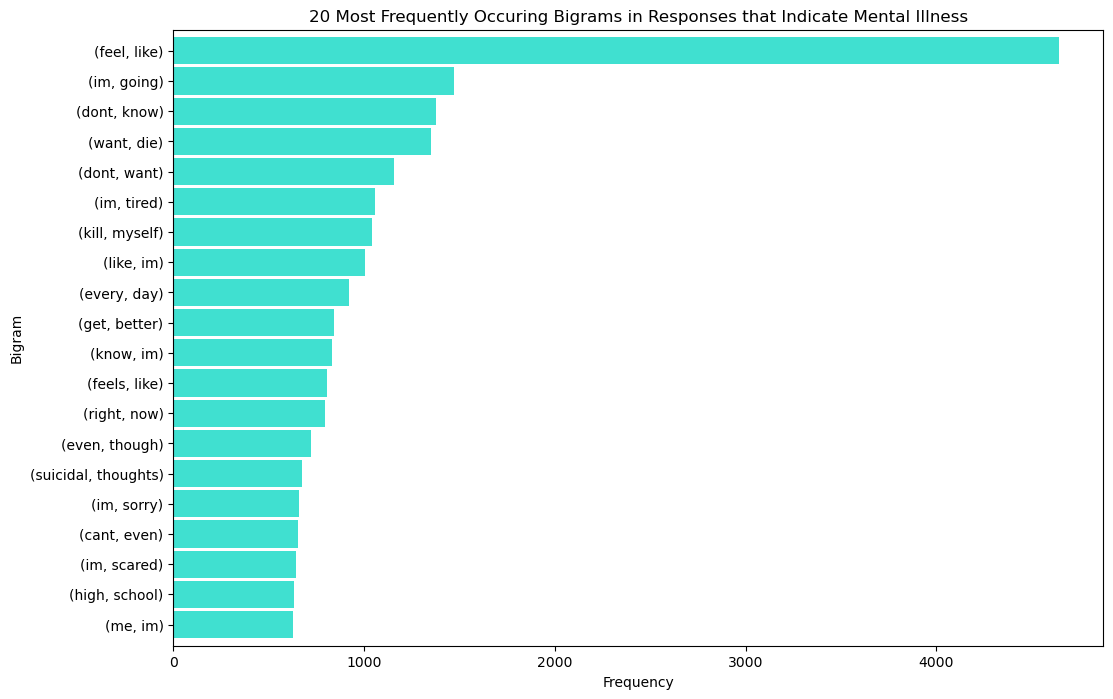

In [18]:
# Creating a plot of the number of bigrams for flagged responses
mental_health_bigrams_series.sort_values().plot.barh(color='turquoise', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams in Responses that Indicate Mental Illness')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

In [19]:
# Importing python packages
import pandas as pd
import numpy as np

# Packages for classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Looking at number of rows and columns
data.shape

(27977, 2)

In [21]:
# Looking at the data types 
data.dtypes

Response    object
Label        int64
dtype: object

In [22]:
# Package for Sentiment analysis
from textblob import TextBlob

In [23]:
# Definition for sentiment analysis
def get_sentiment(Response):

# Putting text in textblob
  blob = TextBlob(Response)

# Polarity score
  sentiment = blob.sentiment.polarity

# Putting the score into categories (positive, negative, neutral)
  if sentiment > 0:
    result = "Positive"
  elif sentiment < 0:
    result = "Negative"
  else:
    result = "Neutral"
  return result

In [24]:
# Using a response to test sentiment analysis
get_sentiment ("im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy brain feels like constantly like static tv wont shut overthinking do think im running options dont see living past  got accepted health science degree dont even know wanna try know im smart mental illness holds back think cant anything im good enough need fucking help dont know anymore ive run options")

'Negative'

In [25]:
# Getting the sentiment of the entire dataset 
data['Sentiment'] = data['Response'].apply(get_sentiment)


In [26]:
# Checking data 
data.head(10)

,Response,Label,Sentiment
0,dear american teens question dutch person hear...,0,Positive
1,nothing look forward lifei dont many reasons k...,1,Positive
2,music recommendations im looking expand playli...,0,Positive
3,im done trying feel betterthe reason im still ...,1,Negative
4,worried year old girl subject domestic physic...,1,Negative
5,hey rredflag sure right place post this goes ...,1,Positive
6,feel like someone needs hear tonight feeling r...,0,Positive
7,deserve liveif died right noone would carei re...,1,Positive
8,feels good ive set dateim killing friday nice ...,1,Positive
9,live guiltok made stupid random choice its ge...,1,Negative


In [27]:
# Comparing the labels to sentiment
data.groupby(['Label', 'Sentiment']).size()

Label  Sentiment
0      Negative     4249
       Neutral      2188
       Positive     7702
1      Negative     6929
       Neutral       709
       Positive     6200
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


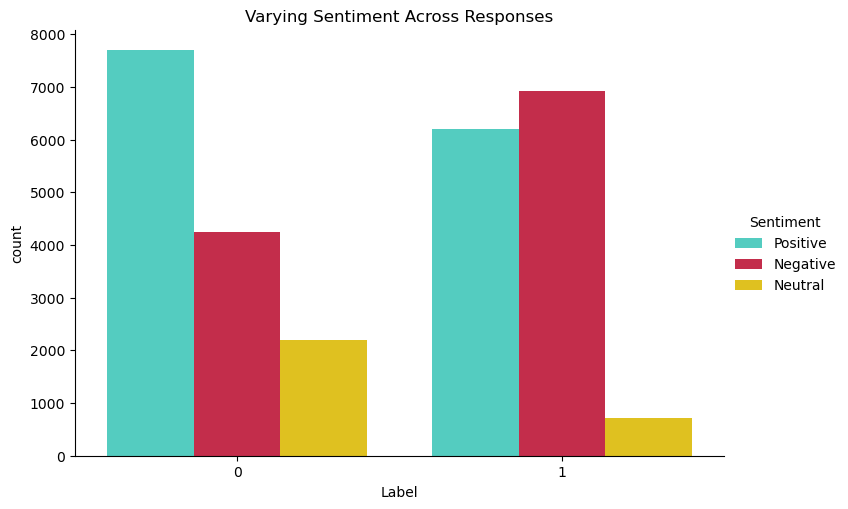

In [28]:
# Making a catplot
custom_colors = ("Turquoise", "Crimson", "Gold")
sns.catplot(x = 'Label', data = data, hue = 'Sentiment', kind = 'count', aspect = 1.5, palette=custom_colors).set(title = 'Varying Sentiment Across Responses')

In [29]:
# Packages for machine learning model 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [30]:
# Feature Extraction
# importing Count Vectorizer 
count_vec=CountVectorizer()
count_vec.fit(data['Response'])
data_features = count_vec.transform(data['Response'])
# making an array
feature_matrix = data_features.toarray()
print(feature_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
# Building Features from text
xFeatures = data["Response"]
ylabels = data["Label"]

In [32]:
# Getting feature names
cv = CountVectorizer()
x = cv.fit_transform(xFeatures)
cv.get_feature_names_out()

array(['__', '___', '____', ..., 'zzuckerberg', 'zzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'], dtype=object)

In [33]:
# Splitting the dataset into train and test groups
x_train, x_test, y_train, y_test = train_test_split(x,ylabels, test_size = 0.153, random_state = 53)

In [34]:
# Building model
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [35]:
# Testing accuracy
nb_model.score(x_test, y_test)

0.844662462041579

In [36]:
# Predictions
y_predict = nb_model.predict(x_test)

In [37]:
#Testing model
sample_text=["I love coding"]
vector = cv.transform(sample_text).toarray()
# Making nb model 
nb_model.predict(vector)
nb_model.predict_proba(vector)
nb_model.classes_

array([0, 1])

In [38]:
# Confidence in the result
np.max(nb_model.predict_proba(vector))

0.7162933838787543

In [39]:
# Packages for logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression

In [40]:
# Splitting the dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(x,ylabels, test_size = 0.148, random_state =30 )

In [41]:
#Logistic Regression 

def predict_classification(sample_text, model):
  vector = cv.transform(sample_text).toarray()   # Transforming our text data into vectors
  prediction = model.predict(vector)             # Puttting data in model
  pred_proba = model.predict_proba(vector)       # Confidence of prediction
  pred_percent = dict(zip(model.classes_, pred_proba[0]))
  print(prediction)
  return pred_percent

In [42]:
# Making logistic Regression model
lr_model = LogisticRegression(multi_class= "multinomial")
lr_model.fit(x_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [43]:
# Testing accuracy
lr_model.score(x_test, y_test)

0.9169282781936731

In [44]:
sample_text=["im done trying feel better the reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy brain feels like constantly like static tv wont shut overthinking do think im running options dont see living past  got accepted health science degree dont even know wanna try know im smart mental illness holds back think cant anything im good enough need fucking help dont know anymore ive run options"]
vector = cv.transform(sample_text).toarray()
lr_model.predict(vector)
lr_model.predict_proba(vector)
lr_model.classes_

array([0, 1])

In [45]:
predict_classification(sample_text, lr_model)

[1]


{0: 1.92164992588853e-06, 1: 0.999998078350074}


**Results and Conclusion:**

Sentiment analysis revealed that among responses that indicate poor mental health, positive, negative, and neutral sentiments were present, with a slight majority being negative. Among responses that indicate normal mental health, the majority were positive. Our Naive Bayes predictive model achieved an accuracy of 84.5%. Our logistic regression model achieved an accuracy of 91.7%. Both models were successful in predicting mental health quality with solely subreddit data, which proves that mental health illnesses can be identified early without official interaction with a doctor or psychologist. This model can also be applied to other social media platforms where people express their thoughts an emotions. To improve this model, the subreddit responses could be categorized by the type of mental illness indicated in order to provide specialized help. 

**Acknowledgements:**

Dataset: https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus 

Contributors: Sophie Lawrence, Ria Trivedi, Ashley Victor (mentor)